In [1]:
import pandas as pd
import os, time
from scipy import stats
import requests, csv, numpy as np, re
import matplotlib.pyplot as plt

In [2]:
wiki = pd.read_csv("C:\\Users\\soumy\\Downloads\\editor_activity_combined.tsv", sep="\t")

In [3]:
wiki_articles = wiki[wiki["page_namespace"]==0]

In [4]:
eng_wiki = wiki_articles[wiki_articles["wiki_db"]=="enwiki"]

In [5]:
eng_wiki.head(10)

,user_text,wiki_db,page_namespace,year,num_edits
0,!RemagoediV,enwiki,0.0,2006,2
1,!bdpqbd! 9,enwiki,0.0,2014,2
3,!iorgi!,enwiki,0.0,2011,4
4,!iorgi!,enwiki,0.0,2012,2
5,!iorgi!,enwiki,0.0,2013,3
6,!iorgi!,enwiki,0.0,2014,3
9,!keegan!12,enwiki,0.0,2008,2
10,"""Primitive Revolutionaries of China",enwiki,0.0,2010,71
12,"""WP; ranjeet singh",enwiki,0.0,2019,15
13,"""kashi2020""",enwiki,0.0,2020,2


In [10]:
# eng_edits = eng_wiki.groupby(["user_text"]).agg({
#     'user_text': pd.Series.nunique,
#     'num_edits': sum,
# })
# del eng_edits["user_text"]
# eng_edits.to_csv(r"C:\\Users\\soumy\\Downloads\\EnwikiEdits.csv", header = True) 
eng_edits = pd.read_csv("C:\\Users\\soumy\\Downloads\\EnwikiEdits.csv", sep=",")

In [11]:
# total_edits = wiki_articles.groupby(["user_text"]).agg({
#     'user_text': pd.Series.nunique,
#     'num_edits': sum,
# })
# del total_edits["user_text"]
# total_edits.to_csv(r"C:\\Users\\soumy\\Downloads\\TotalEdits.csv", header = True)
total_edits = pd.read_csv("C:\\Users\\soumy\\Downloads\\TotalEdits.csv", sep=",")

In [7]:
vital = pd.read_csv("C:\\Users\\soumy\\Downloads\\Data.csv", sep=",")

In [8]:
ls = vital["Username"].to_list()

In [9]:
len(ls)

863

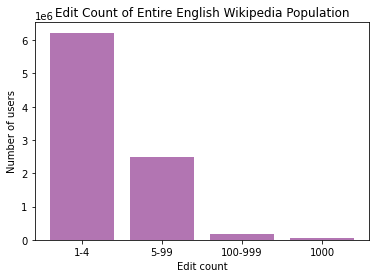

In [53]:
lst1 = eng_edits['num_edits'].to_list()
#c0 = lst1.count(0)
c1_4 = sum(1 for i in lst1 if 1<=i<=4)
c5_99 = sum(1 for i in lst1 if 5<=i<=99)
c100_999 = sum(1 for i in lst1 if 100<=i<=999)
c1000 = sum(1 for i in lst1 if i>=1000)
height = (c1_4, c5_99, c100_999, c1000)
bars = ("1-4","5-99","100-999","1000")
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Edit count')
plt.ylabel('Number of users')
plt.title("Edit Count of Entire English Wikipedia Population")

# Create names
plt.xticks(y_pos, ("1-4","5-99","100-999","1000"))

# Show graphic
plt.show()

In [52]:
vital_eng_edits.head(10).num_edits.median()

3864.5

In [ ]:
#eng_edits.loc["!keegan!12"]["num_edits"]

In [13]:
temp = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\EnwikiEdits.csv") #index_col="user_text" 

In [14]:
# vital_eng_edits = temp[temp["user_text"].isin(ls)]
# vital_eng_edits.to_csv(r"C:\\Users\\soumy\\Downloads\\VitalEnwikiEdits.csv", index = False)
vital_eng_edits = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\VitalEnwikiEdits.csv")

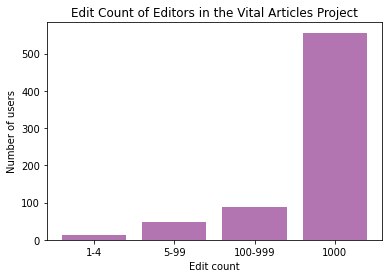

In [54]:
lst1 = vital_eng_edits['num_edits'].to_list()
c1_4 = sum(1 for i in lst1 if 1<=i<=4)
c5_99 = sum(1 for i in lst1 if 5<=i<=99)
c100_999 = sum(1 for i in lst1 if 100<=i<=999)
c1000 = sum(1 for i in lst1 if i>=1000)
height = (c1_4, c5_99, c100_999, c1000)
bars = ("1-4","5-99","100-999","1000")
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Edit count')
plt.ylabel('Number of users')
plt.title("Edit Count of Editors in the Vital Articles Project")

# Create names
plt.xticks(y_pos, ("1-4","5-99","100-999","1000"))

# Show graphic
plt.show()

In [18]:
# temp2 = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\TotalEdits.csv")
# vital_total_edits = temp2[temp2["user_text"].isin(ls)]
# vital_total_edits.to_csv(r"C:\\Users\\soumy\\Downloads\\VitalTotalEdits.csv", index = False)
vital_total_edits = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\VitalTotalEdits.csv")

In [19]:
VitalTE = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\VitalTotalEdits.csv", index_col="user_text")
VitalEE = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\VitalEnwikiEdits.csv", index_col="user_text")
ls_vital = vital_total_edits["user_text"].to_list()
lang = VitalTE.copy()
for i in ls_vital:
    try:
        t = VitalEE.loc[i]["num_edits"]
    except:
        t = 0
    print(t)
    lang.at[i, "en_edits"] =  t

6308
1209
1946
23348
1088
12015
2470
5259
31935
390
2574
640
5056
588
1812
5094
1309
718
7287
47609
82402
3680
1225
100
7578
5486
467
34743
22803
7684
14635
9121
18137
477
28040
13
97291
3680
42351
41466
17499
5264
30
7233
2020
29691
84191
944
1046
62515
15641
5427
606
108
1813
1123922
8451
9939
28
23526
38505
69936
23664
95707
41891
151506
10521
232605
6804
65284
6874
494
8621
216
7126
18347
3
138
9
1685
36724
7593
6168
87
53
3767
9
4215
12084
3192
17700
1149
4256
1046
1
28335
436
34524
3173
5510
4879
99710
5414
7721
12661
66
2246
14412
34
19786
128989
5714
2849
11780
8131
38158
2104
1877
30693
7110
1090
13387
8869
435
147070
23036
2418
31569
41660
8846
7
80802
577
46373
15814
570
14235
2665
3469
3301
39
15143
77314
405
3659
106441
141115
4410
607
11216
5735
1874
30309
5223
6371
21
114001
13785
167528
69830
23247
20648
1103
84261
2944
6780
202510
36504
193
33378
110179
61783
13220
75485
19241
4602
18017
44830
97125
10082
12291
15244
109776
3261
16
109713
1039
15065
5984
1
2286
40585
3

In [20]:
#int(vital_total_edits[vital_total_edits["user_text"]=="Thi"]["num_edits"])
lang["enwiki%"] = (lang["en_edits"] / lang["num_edits"])*100

In [21]:
lang

,num_edits,en_edits,enwiki%
user_text,,,
069952497a,6330,6308.0,99.652449
15lsoucy,1209,1209.0,100.000000
A Den Jentyl Ettien Avel Dysklyver,2322,1946.0,83.807063
A. Parrot,23469,23348.0,99.484426
A.J.A.,1088,1088.0,100.000000
...,...,...,...
Zaheen,35713,2198.0,6.154622
Zangar,6354,6293.0,99.039975
Zingarese,5326,5273.0,99.004882


Text(0.5, 1.0, 'Percentage of edits in the en wiki by editors in the Vital Articles Project')

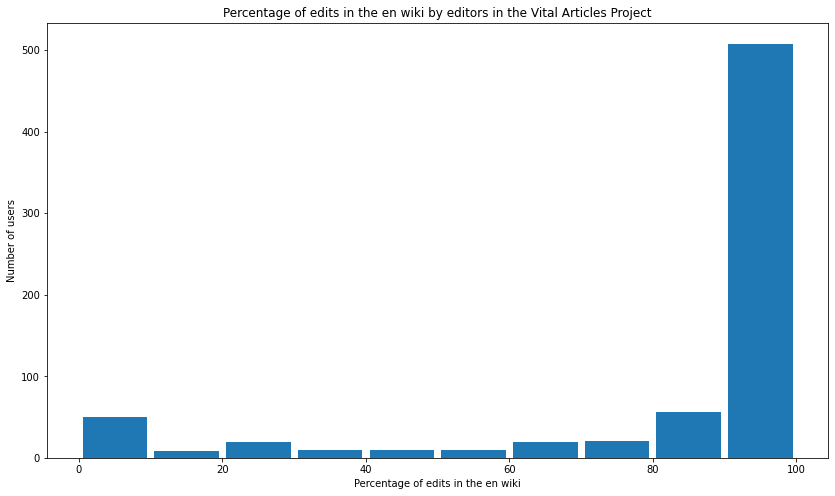

In [22]:
lang.hist(column='enwiki%', grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Percentage of edits in the en wiki')
plt.ylabel('Number of users')
plt.title("Percentage of edits in the en wiki by editors in the Vital Articles Project")

In [23]:
total = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\TotalEdits.csv")
eng = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\EnwikiEdits.csv", index_col="user_text")
lsT = total["user_text"].to_list()
total = pd.read_csv(r"C:\\Users\\soumy\\Downloads\\TotalEdits.csv", index_col="user_text")
langT = total.copy()
for i in lsT:
    try:
        t = eng.loc[i]["num_edits"]
    except:
        t = 0
    langT.at[i, "en_edits"] =  t

Text(0.5, 1.0, 'Percentage of edits in the en wiki by General Wikipedia Population')

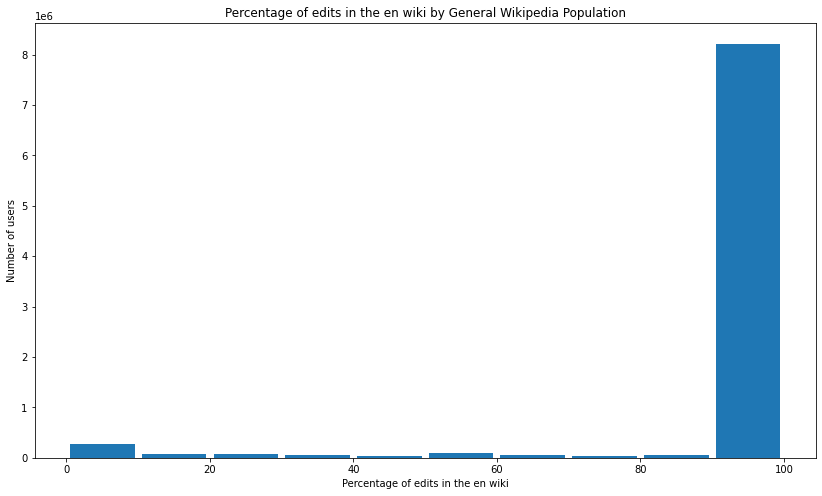

In [24]:
langT["enwiki%"] = (langT["en_edits"] / langT["num_edits"])*100
langT.hist(column='enwiki%', grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Percentage of edits in the en wiki')
plt.ylabel('Number of users')
plt.title("Percentage of edits in the en wiki by General Wikipedia Population")

In [26]:
# groups_df = pd.read_csv("Groups.csv",sep=",")
# rights_df = pd.read_csv("Rights.csv",sep=",")
# groups_connect_df = pd.read_csv("GroupsConnect.csv",sep=",")
# rights_connect_df = pd.read_csv("RightsConnect.csv",sep=",")
data = pd.read_csv("Data.csv",sep=",")
pd.set_option("max_rows", None)

In [27]:
data["Anonymous"].value_counts()

0    794
1     69
Name: Anonymous, dtype: int64

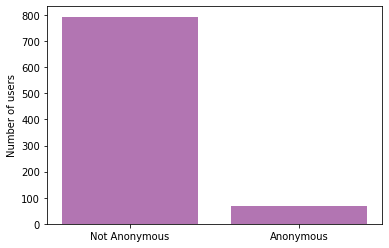

In [28]:
height = data["Anonymous"].value_counts()
bars = (0,1)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

plt.ylabel('Number of users')

# Create names
plt.xticks(y_pos, ('Not Anonymous','Anonymous'))

# Show graphic
plt.show()

In [29]:
data["Gender"].value_counts()

unknown    442
male       274
female      21
Name: Gender, dtype: int64

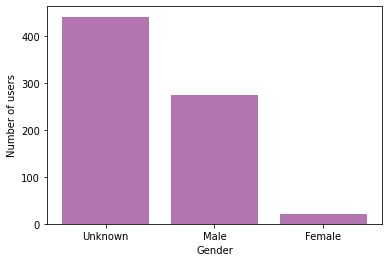

In [30]:
height = data["Gender"].value_counts()
bars = ("unknown","male","female")
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Gender')
plt.ylabel('Number of users')

# Create names
plt.xticks(y_pos, ('Unknown','Male','Female'))

# Show graphic
plt.show()

In [ ]:
data["Gender"].

In [38]:
groups_connect_df.join(groups_df.set_index('Identifier'), how='left', on='groups_df_id')["Group"].value_counts()

NameError: name 'groups_connect_df' is not defined

In [ ]:
#groups_connect_df.join(groups_df.set_index('Identifier'), how='left', on='groups_df_id')["Group"].value_counts().plot.bar( x='Group', y='val', rot=90)
height = groups_connect_df.join(groups_df.set_index('Identifier'), how='left', on='groups_df_id')["Group"].value_counts()
bars = groups_df["Group"]
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Groups')
plt.ylabel('Number of users')

# Create names
plt.xticks(y_pos, groups_df["Group"], rotation=90)

# Show graphic
plt.show()

In [ ]:
rights_connect_df.join(rights_df.set_index('Identifier'), how='left', on='rights_df_id')["Right"].value_counts()

In [ ]:
data.sort_values(by=['Edit Count'])

In [ ]:
data.hist(column='Edit Count', bins=35, grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Number of edits')
plt.ylabel('Number of users')

In [ ]:
data["Edit Count"].describe().apply(lambda x: format(x, 'f'))

In [ ]:
data["Registration_epoch_diff"] = (1596257999 - data["Registration_epoch"])
temp = data.copy().sort_values(by=["Registration_epoch"])
temp["Registration_epoch_diff"] = data["Registration_epoch_diff"]/(3600*24*365)

In [ ]:
temp.hist(column='Registration_epoch_diff', bins=35, grid=False, figsize=(14,8), rwidth=0.9, legend=True)
plt.xlabel('Number of years from time of registration till 07/31/20')
plt.ylabel('Number of users')

In [ ]:
temp["Registration_epoch_diff"].describe().apply(lambda x: format(x, 'f'))

In [41]:
data = pd.read_csv("Data2.csv",sep=",")

In [42]:
temp2 = data.copy()
temp2["First_edit_epoch_diff"] = data["First_edit_epoch_diff"]/(3600*24*365)
temp2.hist(column='First_edit_epoch_diff', bins=35, grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Difference in time betweeen registration and first edit (in years)')
plt.ylabel('Number of users')

KeyError: 'First_edit_epoch_diff'

In [ ]:
temp2["Last_edit_epoch_diff"] = data["Last_edit_epoch_diff"]/(3600*24*365)
temp2.hist(column='Last_edit_epoch_diff', bins=35, grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Difference in time betweeen registration and last edit (in years)')
plt.ylabel('Number of users')

In [ ]:
temp2["Edit_time_diff"] = (data["Last_edit"] - data["First_edit"])/(3600*24*365)

In [ ]:
temp2.hist(column='Edit_time_diff', bins=35, grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Difference in time betweeen first edit and last edit (in years)')
plt.ylabel('Number of users')

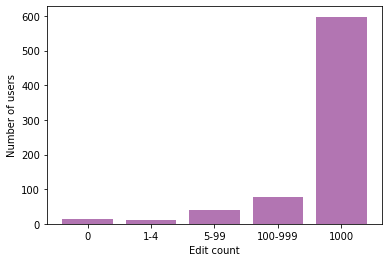

In [43]:
lst1 = data['Edit Count'].to_list()
c0 = lst1.count(0)
c1_4 = sum(1 for i in lst1 if 1<=i<=4)
c5_99 = sum(1 for i in lst1 if 5<=i<=99)
c100_999 = sum(1 for i in lst1 if 100<=i<=999)
c1000 = sum(1 for i in lst1 if i>=1000)
height = (c0, c1_4, c5_99, c100_999, c1000)
bars = ("0","1-4","5-99","100-999","1000")
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Edit count')
plt.ylabel('Number of users')

# Create names
plt.xticks(y_pos, ("0","1-4","5-99","100-999","1000"))

# Show graphic
plt.show()

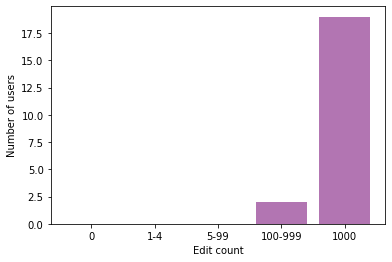

In [31]:
lst1 = data[data['Gender']=="female"]["Edit Count"].to_list()
c0 = lst1.count(0)
c1_4 = sum(1 for i in lst1 if 1<=i<=4)
c5_99 = sum(1 for i in lst1 if 5<=i<=99)
c100_999 = sum(1 for i in lst1 if 100<=i<=999)
c1000 = sum(1 for i in lst1 if i>=1000)
height = (c0, c1_4, c5_99, c100_999, c1000)
bars = ("0","1-4","5-99","100-999","1000")
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

#plt.title('My title')
plt.xlabel('Edit count')
plt.ylabel('Number of users')

# Create names
plt.xticks(y_pos, ("0","1-4","5-99","100-999","1000"))

# Show graphic
plt.show()

In [ ]:
lang = pd.read_csv("EditByLanguage.csv",sep=",")

In [ ]:
plt.hist(lang["not_en_%"].to_list(), bins = 20, rwidth=0.9)
plt.xlabel('Percentage of edits not in the english wikipedia')
plt.ylabel('Number of users')

In [44]:
data[data['Gender']=="female"]

,Unnamed: 0,Identifier,Username,Anonymous,Gender,Edit Count,Registration_epoch,Registration,Registration_epoch_diff
15,15,16,Almafeta,0,female,1517.0,1.101112e+09,2004-11-22T02:18:46Z,495146473.0
60,60,61,AuroralColibri,0,female,1147.0,1.430385e+09,2015-04-30T04:04:52Z,165873307.0
142,142,143,Feminist,0,female,147637.0,1.434649e+09,2015-06-18T12:42:02Z,161608677.0
286,286,287,WhatamIdoing,0,female,94837.0,1.155546e+09,2006-08-14T03:52:08Z,440712471.0
396,396,397,Funandtrvl,0,female,183697.0,1.165562e+09,2006-12-08T01:14:17Z,430695942.0
400,400,401,Cocolacoste,0,female,1691.0,1.349003e+09,2012-09-30T05:56:45Z,247255394.0
416,416,417,Ealdgyth,0,female,137350.0,1.180253e+09,2007-05-27T02:58:00Z,416005319.0
417,417,418,Diannaa,0,female,286783.0,1.254980e+09,2009-10-08T00:26:50Z,341278389.0
469,469,470,KTC,0,female,23364.0,1.102758e+09,2004-12-11T03:41:13Z,493499926.0
491,491,492,Maplestrip,0,female,23233.0,1.413406e+09,2014-10-15T15:51:30Z,182851709.0


In [ ]:
vital_eng_edits['num_edits'].describe()

In [ ]:
temp['num_edits'].describe()

In [32]:
total_data = pd.read_csv("C:\\Users\\soumy\\Downloads\\discussion_data.tsv",sep="\t")

In [33]:
talk_edits = total_data.groupby(['User']).size()

In [34]:
new_df = talk_edits.to_frame(name = 'Edits').reset_index()

In [35]:
new_df

,User,Edits
0,&,10
1,069952497a,5
2,107.0.6.250,1
3,116.49.135.38,1
4,117.55.68.144,1
5,121.45.193.118,3
6,121.45.194.72,1
7,121.45.213.224,2
8,124.83.119.39,12
9,129.138.147.10,1


Text(0, 0.5, 'Number of users')

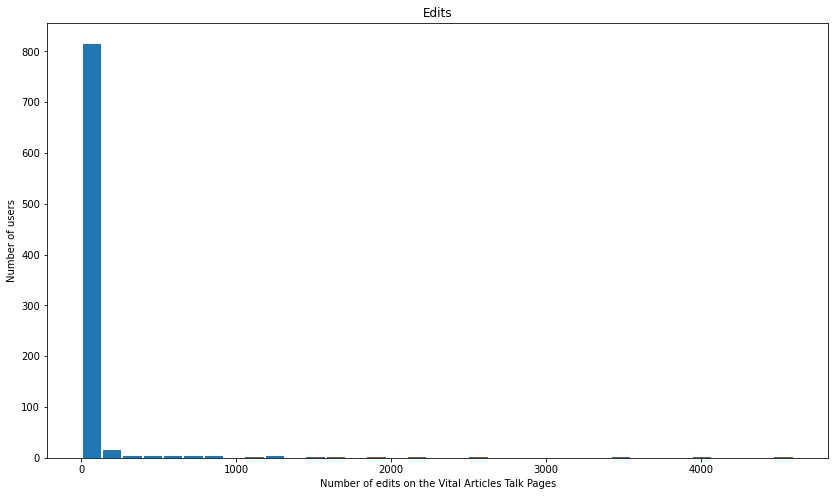

In [36]:
new_df.hist(column='Edits', bins=35, grid=False, figsize=(14,8), rwidth=0.9)
plt.xlabel('Number of edits on the Vital Articles Talk Pages')
plt.ylabel('Number of users')

In [37]:
new_df.describe()

,Edits
count,863.000000
mean,59.885284
std,322.803399
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,4598.000000


In [ ]:
#weeks or months